Here is a $4\times 4$ Chebyshev differentiation matrix.

In [1]:
include("../FNC.jl")
t,Dx = FNC.diffcheb(3,[-1,1])
Dx

4×4 Array{Float64,2}:
 -3.16667    4.0       -1.33333    0.5     
 -1.0        0.333333   1.0       -0.333333
  0.333333  -1.0       -0.333333   1.0     
 -0.5        1.33333   -4.0        3.16667 

We again test the convergence rate.  

In [2]:
f = x -> x + exp(sin(4*x));
dfdx = x -> 1 + 4*exp(sin(4*x))*cos(4*x);
d2fdx2 = x -> 4*exp(sin(4*x))*(4*cos(4*x)^2-4*sin(4*x));

n = 5:5:70
err1 = zeros(size(n))
err2 = zeros(size(n))
using LinearAlgebra
for (k,n) = enumerate(n)
    t,Dx,Dxx = FNC.diffcheb(n,[-1,1])
    y = f.(t)
    err1[k] = norm( dfdx.(t) - Dx*y, Inf )
    err2[k] = norm( d2fdx2.(t) - Dxx*y, Inf )
end

using DataFrames
DataFrame(n=n,error_first=err1,error_second=err2)

,n,error_first,error_second
,Int64,Float64,Float64
1,5,2.79836,46.4779
2,10,0.748502,34.6393
3,15,0.0870108,10.5477
4,20,0.00657271,1.59913
5,25,0.000387174,0.160919
6,30,2.01505e-5,0.012071
7,35,8.79023e-7,0.000717109
8,40,3.27907e-8,3.4952e-5
9,45,1.05804e-9,1.42753e-6


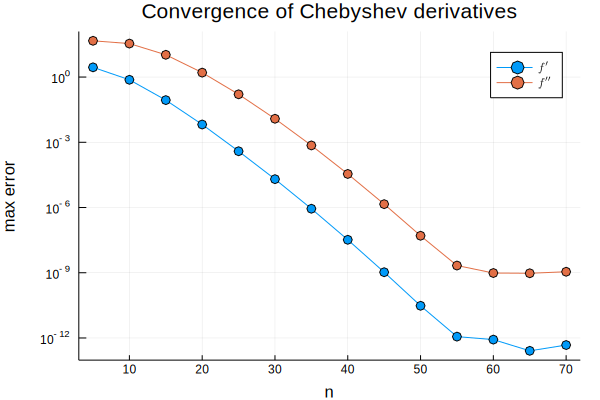

In [3]:
using Plots
plot(n,[err1 err2],m=:o,label=["\$f'\$" "\$f''\$"],
    xaxis=("n"), yaxis=(:log10,"max error"),
    title="Convergence of Chebyshev derivatives")

Notice that the graph has a log-linear scale, not log-log. Hence the convergence is exponential, as we expect for a spectral method on a smooth function. 